In [1]:
import numpy as np
import pandas as pd

## links_df

In [2]:
links_df = pd.read_csv(r"C:\Users\archana\Downloads\movie_data\links.csv")

In [3]:
links_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


## movies_df

In [4]:
movies_df = pd.read_csv(r"C:\Users\archana\Downloads\movie_data\movies.csv")

In [5]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## ratings_df

In [6]:
ratings_df = pd.read_csv(r"C:\Users\archana\Downloads\movie_data\ratings.csv")

In [7]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## tags_df

In [8]:
tags_df= pd.read_csv(r"C:\Users\archana\Downloads\movie_data\tags.csv")

In [9]:
tags_df

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


#### What is the shape of "movies.csv"?

In [10]:
movies_df.shape

(9742, 3)

#### What is the shape of "ratings.csv"?

In [11]:
ratings_df.shape

(100836, 4)

#### How many unique "userId" are available in "ratings.csv"?

In [12]:
 ratings_df['userId'].nunique()

610

#### Which movie has recieved maximum number of user ratings

In [13]:
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

movie_ratings_count = merged_df.groupby('title')['rating'].count()

max_rated_movie_title = movie_ratings_count.idxmax()

print(f'The movie with the maximum number of user ratings is: {max_rated_movie_title}')

The movie with the maximum number of user ratings is: Forrest Gump (1994)


#### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [14]:
matrix_tags = tags_df[tags_df['movieId'].isin(movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'])]

In [15]:
matrix_tags

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


#### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"

In [16]:
terminator2_ratings = ratings_df[ratings_df['movieId'].isin(movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'])]

# Calculate the average user rating
average_rating = terminator2_ratings['rating'].mean()

print(f'The average user rating for "Terminator 2: Judgment Day (1991)" is: {average_rating:.2f}')

The average user rating for "Terminator 2: Judgment Day (1991)" is: 3.97


#### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like

In [17]:
import matplotlib.pyplot as plt

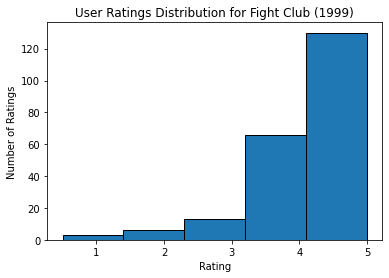

In [18]:
fight_club_ratings = ratings_df[ratings_df['movieId'].isin(movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'])]

plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

* Since the tail is skewed to the left side , the distribution is left skewed

## Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings

In [19]:

grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df[('rating', 'count')] > 50]



C:\Users\archana\AppData\Local\Temp\ipykernel_15572\3727689834.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
C:\Users\archana\AppData\Local\Temp\ipykernel_15572\3727689834.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')


In [20]:
filtered_movies

,movieId,title,genres,"(rating, count)","(rating, mean)"
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [21]:
filtered_movies.rename(columns={('rating', 'count'): 'ratings_count', ('rating', 'mean'): 'average_ratings'}, inplace=True)


C:\Users\archana\AppData\Local\Temp\ipykernel_15572\742179154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies.rename(columns={('rating', 'count'): 'ratings_count', ('rating', 'mean'): 'average_ratings'}, inplace=True)


In [22]:
filtered_movies

,movieId,title,genres,ratings_count,average_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


#### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [23]:
top_5_popular_movies = filtered_movies.nlargest(5, 'ratings_count')

In [24]:
top_5_popular_movies

,movieId,title,genres,ratings_count,average_ratings
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


#### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [25]:
scifi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]
third_most_popular_scifi_movie = scifi_movies.nlargest(3, 'ratings_count').iloc[-1]

print(f'The third most popular Sci-Fi movie is: {third_most_popular_scifi_movie["title"]}')

The third most popular Sci-Fi movie is: Jurassic Park (1993)


### 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.


You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [26]:
movies_with_links = pd.merge(filtered_movies, links_df, on='movieId', how='inner')

In [27]:
movies_with_links

,movieId,title,genres,ratings_count,average_ratings,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [34]:

import requests
from bs4 import BeautifulSoup

In [35]:


def get_imdb_rating(imdb_id):
    id = str(int(imdb_id))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"http://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }


    response = requests.get(URL, headers=request_header)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        imdb_rating_tag = soup.find('span', itemprop='ratingValue')

       
        return imdb_rating_tag.text.strip() if imdb_rating_tag else np.nan
    else:
        print(f"Failed to fetch IMDb page for {imdb_id}. Status code: {response.status_code}")
        return np.nan

movies_with_links['imdb_rating'] = movies_with_links['imdbId'].apply(get_imdb_rating)


In [ ]:
movies_with_links

#### Mention the movieId of the movie which has the highest IMDB rating.

In [ ]:

highest_rated_movie_id = movies_with_links.loc[movies_with_links['imdb_rating'].idxmax(), 'movieId']

print(f"The movieId of the movie with the highest IMDb rating is {highest_rated_movie_id}.")

#### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [ ]:
sci_fi_movies = movies_with_links[movies_with_links['genres'].str.contains('Sci-Fi', case=False)]

if not sci_fi_movies.empty:
    highest_rated_sci_fi_movie_id = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax(), 'movieId']
    print(f"The movieId of the Sci-Fi movie with the highest IMDb rating is {highest_rated_sci_fi_movie_id}.")
else:
    print("No Sci-Fi movies found in the DataFrame.")